In [1]:
using Plots
using LinearAlgebra
using Distributions
gr()

Plots.GRBackend()

# 例19

In [2]:
function min_sq(x, y)
    xbar = mean(x)
    ybar = mean(y)
    β1 = dot(x .- xbar, y .- ybar) ./ norm(x .- xbar) .^ 2
    β0 = ybar .- β1 .* xbar
    (β1, β0)
end

min_sq (generic function with 1 method)

### 人工データ作成

In [3]:
n = 100
da = Normal(2.0, 1.0)
db = Normal()
dx = Normal()
dϵ = Normal()
a = rand(da, 1)[1]
b = rand(db, 1)[1]
x = rand(dx, n)
ϵ = rand(dϵ, n)
y = a .* x .+ b + ϵ;

# 中心化
xx = x .- mean(x);
yy = y .- mean(y);

### 線形回帰

In [4]:
a1, b1 = min_sq(x, y);
a2, b2 = min_sq(xx, yy);

# 予測
x_seq = collect(-3.0:0.1:3.0)
y_pre = a1 .* x_seq .+ b1;
yy_pre = a2 .* x_seq .+ b2;

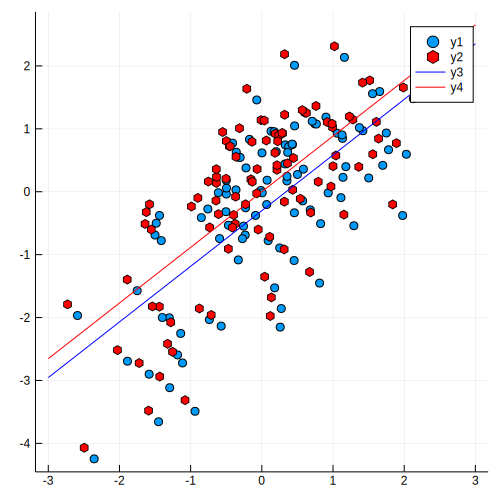

In [5]:
p = plot(size=(500, 500))
plot!(p, x, y, marker=:circle, seriestype=:scatter)
plot!(p, xx, yy, marker=:hexagon, seriestype=:scatter, color=:red)
plot!(p, x_seq, y_pre, color=:blue)
plot!(p, x_seq, yy_pre, color=:red)

# 例20 重回帰

In [6]:
n = 100
# p = 2 # いらない
β = [1, 2, 3]
dx = Normal()
dϵ = Normal()

# 書き方微妙な気がする
# x = [rand(dx, n) rand(dx, n)]
# y = β[1] .+ β[2] * x[:, 1] .+ β[3] * x[:, 2]

# こっちが行列っぽい (1を入れて拡大)
X = [ones(n) rand(dx, n) rand(dx, n)]
y = X * β .+ rand(dϵ, n)

X' * X \ X' * y

3-element Array{Float64,1}:
 1.0500251402588459
 2.1145192284198497
 2.9933730991438363

# 例21 chi-square分布の形

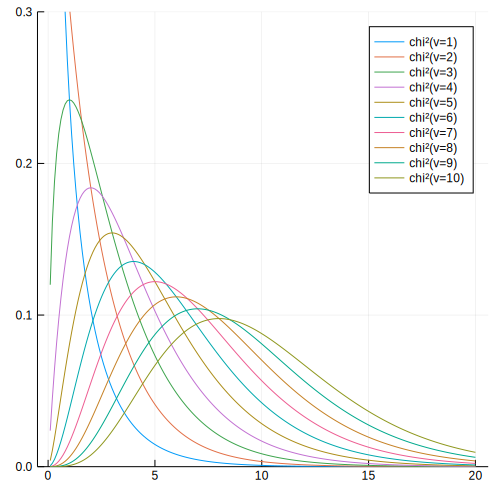

In [7]:
x_seq = collect(0.1:0.1:20.0)
p = plot(size=(500, 500), ylim=(0.0, 0.3))

for i in 1:10
    ci = Chisq(i)
    y = pdf.(ci, x_seq)
    plot!(p, x_seq, y, label="chi²(v=$i)")
end

p

# 例22 t分布の自由度と標準正規分布

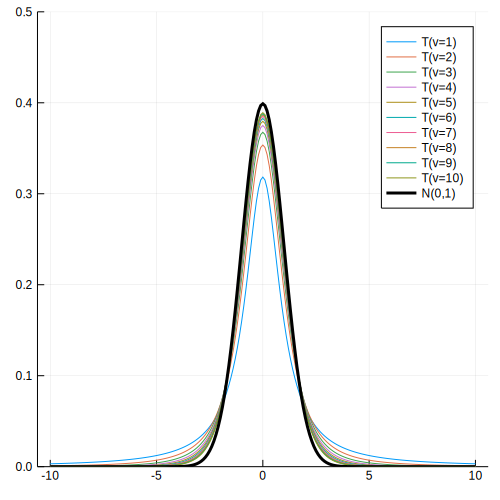

In [8]:
x_seq = collect(-10:0.1:10)
p = plot(size=(500, 500), ylim=(0.0, 0.5))

for i in 1:10
    ti = TDist(i)
    y = pdf.(ti, x_seq)
    plot!(p, x_seq, y, label="T(v=$i)")
end

# 標準正規分布
nd = Normal()
y_nd = pdf.(nd, x_seq)
plot!(p, x_seq, y_nd, label="N(0,1)", lw=3, color=:black)

p

# 例23 繰り返し推定する

In [9]:
# 最初に固定する分
n = 100
dx = Normal(2.0, 1.0)
dϵ = Normal()
x = rand(dx, n)

# εをたくさんやってみる
est_a = Float64[]
est_b = Float64[]

trial = 100
for t in 1:trial
    ϵ = rand(dϵ, n)
    y = x .+ 1 .+ ϵ
    a, b = min_sq(x, y)
    push!(est_a, a)
    push!(est_b, b)
end

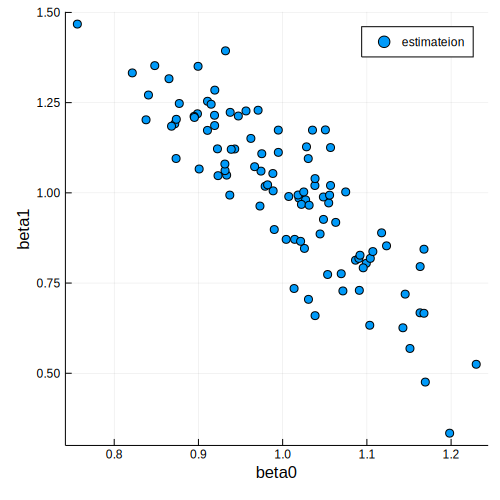

In [10]:
# plot

p = plot(size=(500, 500), xlabel="beta0", ylabel="beta1")
plot!(p, est_a, est_b, seriestype=:scatter, label="estimateion")

# 例24 βの仮説検定

In [11]:
N = 100
p = 1

# 分布
dn = Normal()      # 標準正規分布
dt = TDist(N - 2)  # 自由度N-2のT分布

# 計算
x = rand(dn, N);
y = rand(dn, N);
β1, β0 = min_sq(x, y)
RSS = norm(y .- β0 .- β1 * x) .^ 2
RSE = sqrt(RSS / (N - p - 1))

B0 = (x' * x / N) / norm(x .- mean(x)) .^ 2
B1 = (1 ./ norm(x .- mean(x))) .^ 2
se0 = RSE * sqrt(B0)
se1 = RSE * sqrt(B1)
t0 = β0 / se0
t1 = β1 / se1

p0 = 2 * (1 - cdf(dt, abs(t0)))
p1 = 2 * (1 - cdf(dt, abs(t1)))

println("$β0 $se0 $t0 $p0")
println("$β1 $se1 $t1 $p1")

0.007938960340140137 0.11254869573853153 0.07053800391062372 0.9439091968979327
-0.02210057286474438 0.1257227151175882 -0.17578822445946826 0.8608230459557475


# 例25 計算を繰り返す

In [12]:
N = 100
r = 1000
p = 1
T1 = Float64[]
T2 = Float64[]

# 成立する
for _ in 1:r
    # 分布
    dn = Normal()      # 標準正規分布
    dt = TDist(N - 2)  # 自由度N-2のT分布

    # 計算
    x = rand(dn, N);
    y = rand(dn, N);
    β1, β0 = min_sq(x, y)
    RSS = norm(y .- β0 .- β1 * x) .^ 2
    RSE = sqrt(RSS / (N - p - 1))

    B0 = (x' * x / N) / norm(x .- mean(x)) .^ 2
    B1 = (1 ./ norm(x .- mean(x))) .^ 2
    se0 = RSE * sqrt(B0)
    se1 = RSE * sqrt(B1)
    t0 = β0 / se0
    t1 = β1 / se1

    p0 = 2 * (1 - cdf(dt, abs(t0)))
    p1 = 2 * (1 - cdf(dt, abs(t1)))
    push!(T1, β1 / se1)
end

# 成立しない
for _ in 1:r
    # 分布
    dn = Normal()      # 標準正規分布
    dt = TDist(N - 2)  # 自由度N-2のT分布

    # 計算
    x = rand(dn, N);
    y = 0.1 .* x .+ rand(dn, N);
    β1, β0 = min_sq(x, y)
    RSS = norm(y .- β0 .- β1 * x) .^ 2
    RSE = sqrt(RSS / (N - p - 1))

    B0 = (x' * x / N) / norm(x .- mean(x)) .^ 2
    B1 = (1 ./ norm(x .- mean(x))) .^ 2
    se0 = RSE * sqrt(B0)
    se1 = RSE * sqrt(B1)
    t0 = β0 / se0
    t1 = β1 / se1

    p0 = 2 * (1 - cdf(dt, abs(t0)))
    p1 = 2 * (1 - cdf(dt, abs(t1)))
    push!(T2, β1 / se1)
end

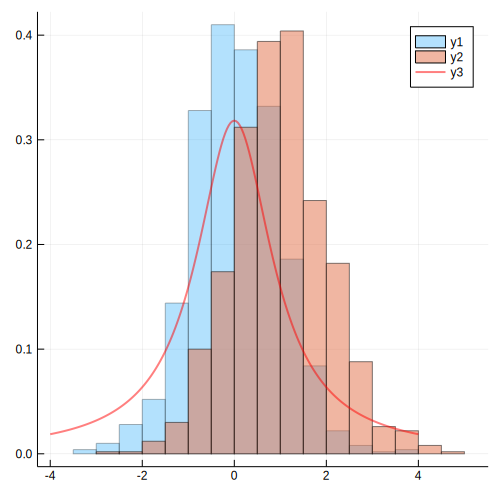

In [13]:
# ヒストグラムの描写
# T1reg = T1 ./ sum(T1)
# T2reg = T2 ./ sum(T2)

p = plot(size=(500, 500))
histogram!(p, T1, nbins=20, alpha=0.3, normed=true)
histogram!(p, T2, nbins=20, alpha=0.5, normed=true)

# T分布
x_seq = collect(-4:0.04:4)
y_tdist = pdf.(TDist(1), x_seq)
plot!(p, x_seq, y_tdist, alpha=0.5, lw=2, color=:red)

p

# 例26

In [14]:
function R2(x, y)
    n = size(x)[1]
    xx = [ones(n) x]  # 1ベクトルを入れる
    β = inv(xx' * xx) * xx' * y
    yhat = xx * β
    ybar = mean(y)
    RSS = norm(y .- yhat) .^ 2
    TSS = norm(y .- ybar) .^ 2
    1 - RSS / TSS
end

R2 (generic function with 1 method)

In [15]:
N = 100
m = 2
dn = Normal()
x = [rand(dn, N) rand(dn, N)];
y = rand(dn, N);
R2(x, y)

0.011992452216933125

In [16]:
# 1変量の場合
x = rand(dn, N)
y = rand(dn, N)
R2(x, y)

0.009889635061936075

In [17]:
cor(x, y) .^ 2

0.009889635061936112

# 例27 VIF計算

- 参考: https://stackoverflow.com/questions/60205374/vif-calculation-in-julia
- ToDo: prepare Boston dataset in Julia

In [18]:
using DelimitedFiles
data = readdlm("housing.data");

In [19]:
function VIF(x)
    values = Float64[]
    p = size(x)[2]
    for j in 1:p
        xx = x[1:end, 1:end .!= j]
        xj = x[1:end, j]
        push!(values, 1 / (1 - R2(xx, xj)))
    end
    values
end

VIF (generic function with 1 method)

In [20]:
VIF(data)

14-element Array{Float64,1}:
 1.831536683713473 
 2.352185889014946 
 3.9925031533175335
 1.0952226687688207
 4.58692024225555  
 2.2603743566681316
 3.100842819545981 
 4.3960072515073945
 7.808198432681462 
 9.205542091810138 
 1.9930156565532824
 1.3814629538442613
 3.5815848036702103
 3.8556842688338224

# 例28 信頼区間

In [21]:
n = 100
p = 1
dn = Normal()
X = rand(dn, n)
X = [ones(n) X]
β = [1.0, -0.5]
ϵ = rand(dn, n)
y = X * β .+ ϵ;

# 関数定義
U = inv(X' * X)
βhat = U * X' * y
RSS = norm(y - X * βhat) .^ 2
RSE = sqrt(RSS / (N - p - 1))
α = 0.05

function f(x, a)
    # a = 0: 信頼区間
    # a = 1: 予測区間
    x = [1 x]
    rg = quantile(TDist(N - p - 1), 0.975) * RSE * sqrt(a .+ x * U * x')
    lower = x * βhat .- rg
    upper = x * βhat .+ rg
    (lower, upper)
end

f (generic function with 1 method)

In [22]:
# plot
x_seq = collect(-10:0.1:10)
lower_seq1 = Float64[]; lower_seq2 = Float64[];
upper_seq1 = Float64[]; upper_seq2 = Float64[];
for i in 1:length(x_seq)
    # a = 0
    push!(lower_seq1, f(x_seq[i], 0)[1][1]);
    push!(upper_seq1, f(x_seq[i], 0)[2][1]);
    # a = 1
    push!(lower_seq2, f(x_seq[i], 1)[1][1]);
    push!(upper_seq2, f(x_seq[i], 1)[2][1]);
end
yy = βhat[1] .+ βhat[2] * x_seq;

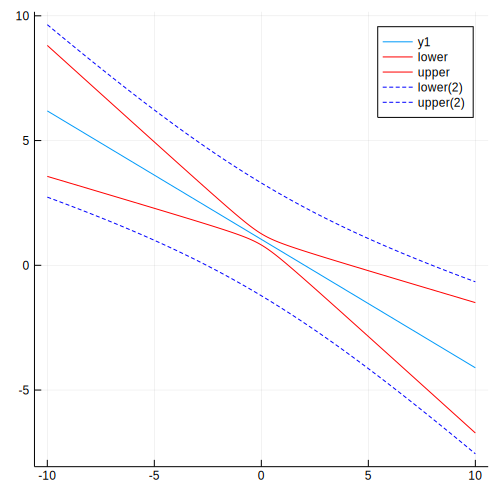

In [23]:
p = plot(size=(500, 500))

plot!(p, x_seq, yy)
plot!(p, x_seq, lower_seq1, color=:red, label="lower")
plot!(p, x_seq, upper_seq1, color=:red, label="upper")
plot!(p, x_seq, lower_seq2, color=:blue, linestyle=:dash, label="lower(2)")
plot!(p, x_seq, upper_seq2, color=:blue, linestyle=:dash, label="upper(2)")

p